In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("/home/jerome/Documents/CSV FILE/filtered_thyroid_data.csv")

In [3]:
df

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [4]:
df.isnull().sum()

Age                0
Gender             0
Hx Radiothreapy    0
Adenopathy         0
Pathology          0
Focality           0
Risk               0
T                  0
N                  0
M                  0
Stage              0
Response           0
Recurred           0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(53)

In [6]:
df.drop_duplicates()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [7]:
num = df.select_dtypes('number')
obj = df.select_dtypes('object')

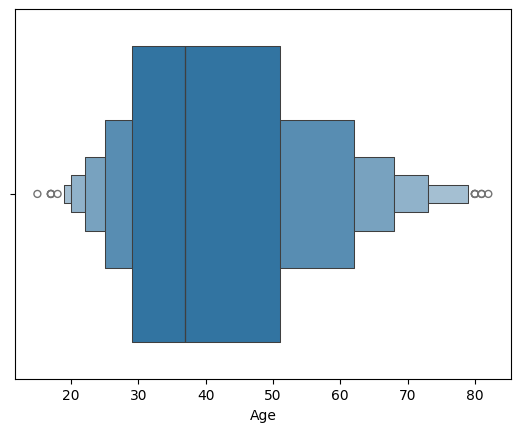

In [8]:
for x in num.columns:
    sns.boxenplot(x = num[x])
    plt.show()

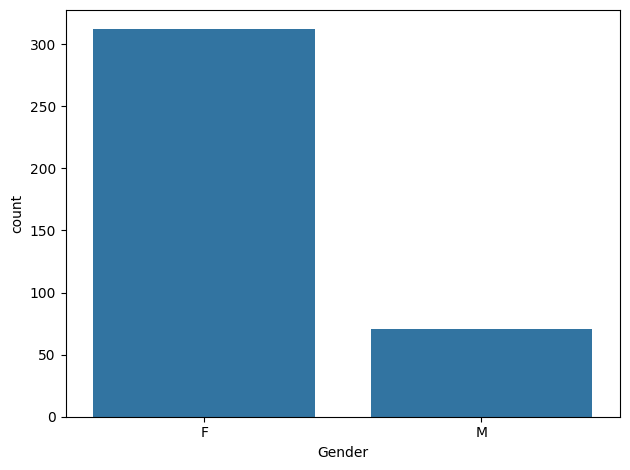

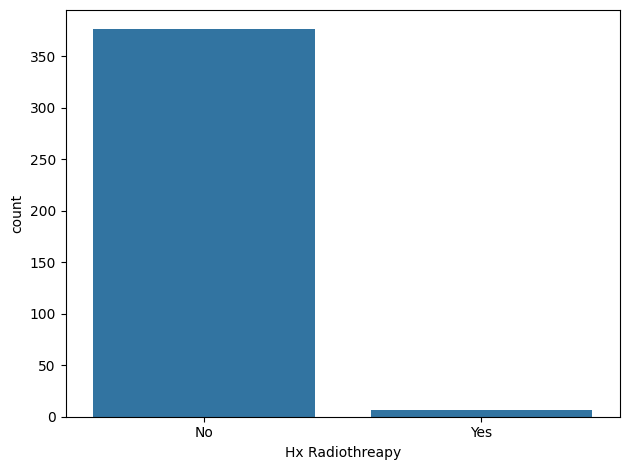

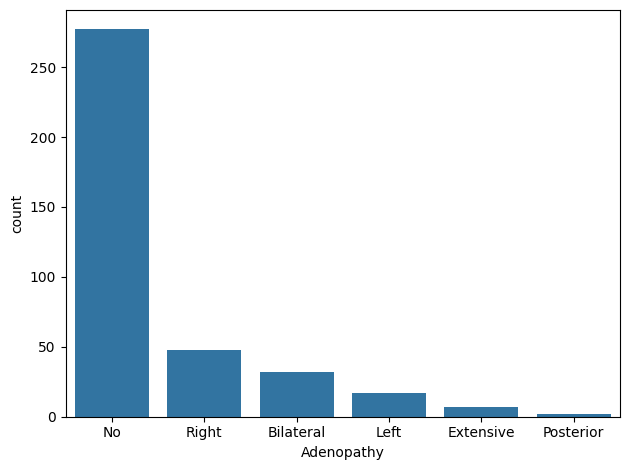

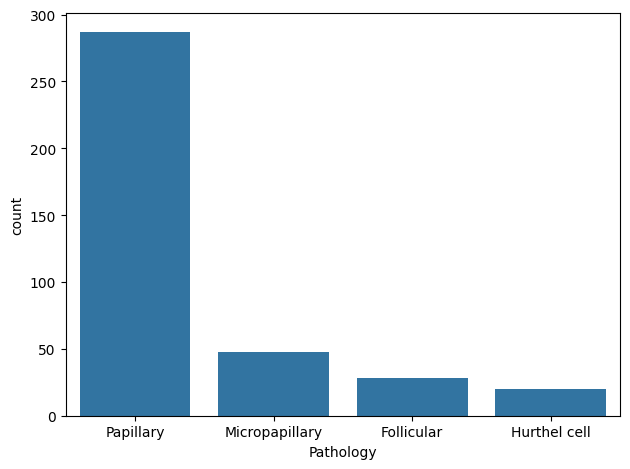

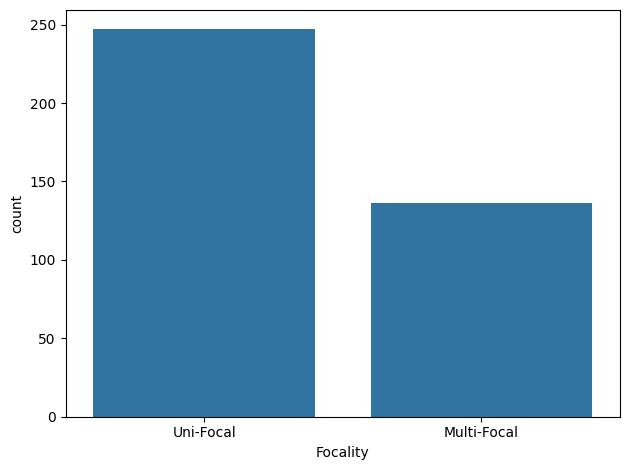

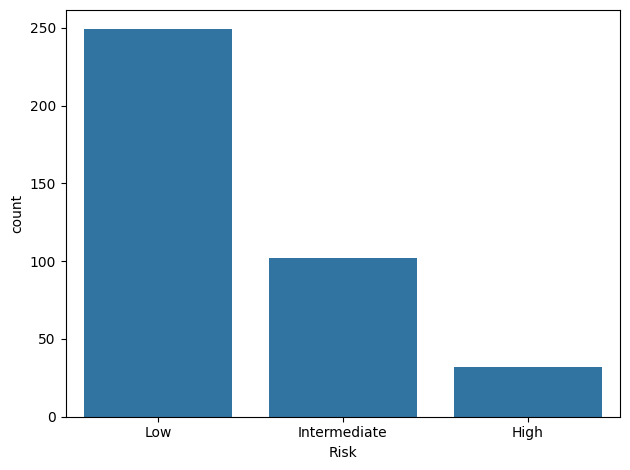

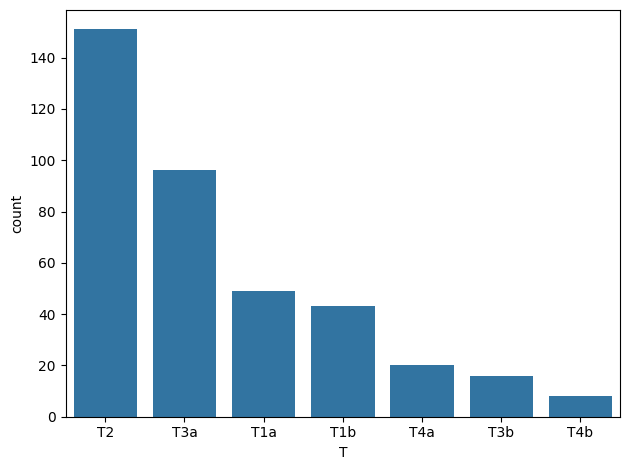

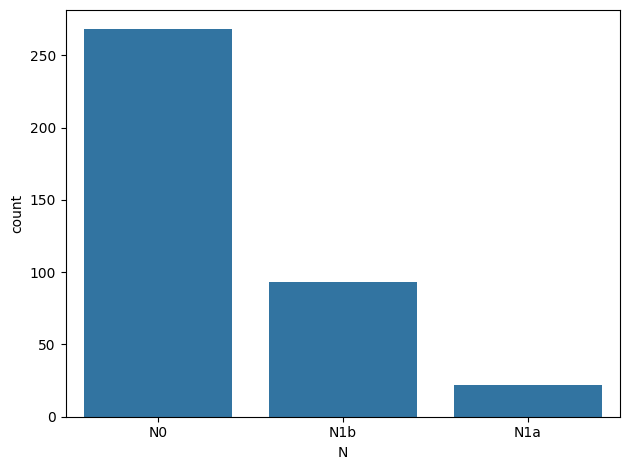

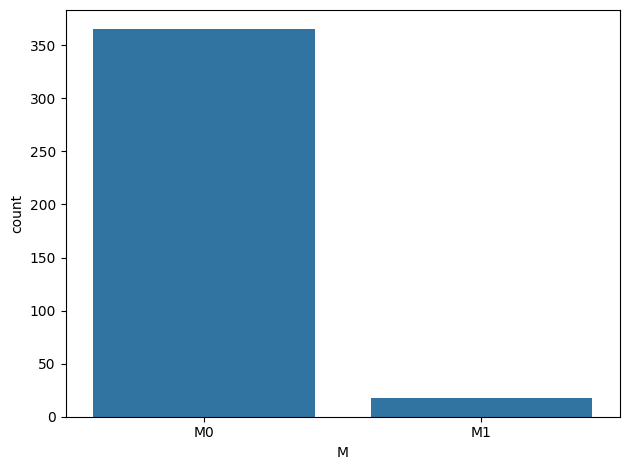

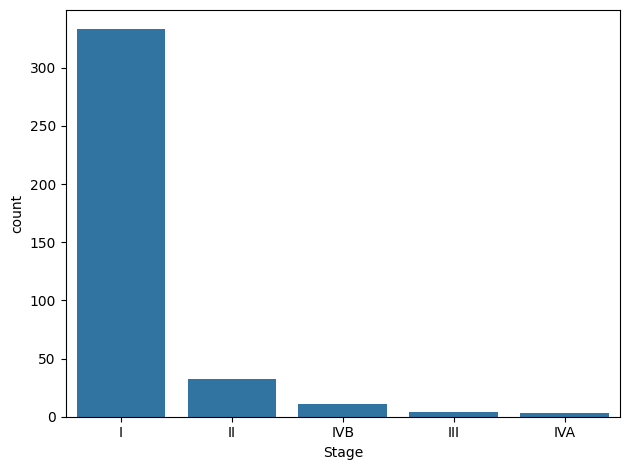

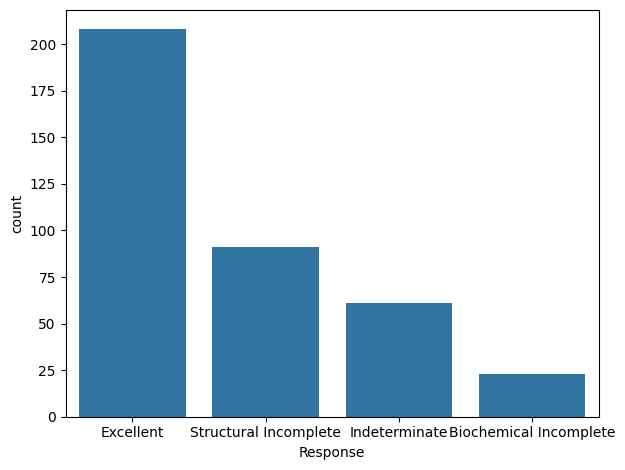

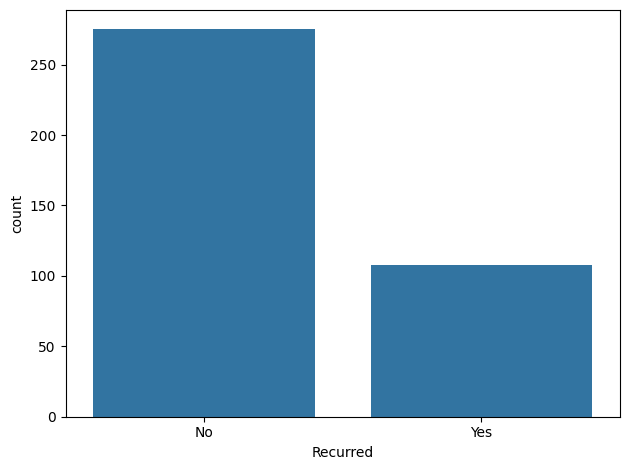

In [9]:
for i in obj.columns:
    sns.barplot(obj[i].value_counts())
    plt.tight_layout()
    plt.show()

In [10]:
le = LabelEncoder()
for i in obj:
    df[i] = le.fit_transform(df[i])

In [11]:
X = df.drop(columns=['Recurred'])
y = df['Recurred']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 45, stratify= y)

In [13]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.87      0.91      0.89        22

    accuracy                           0.94        77
   macro avg       0.92      0.93      0.92        77
weighted avg       0.94      0.94      0.94        77



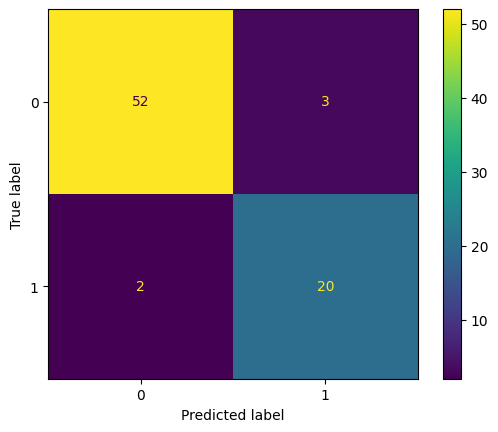

In [14]:
CM = metrics.confusion_matrix(y_test,pred,labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = CM,display_labels = model.classes_)
disp.plot()

In [ ]:
plt.figure(figsize= (15,10))
plot_tree(model,feature_names = X.columns, filled = True)
plt.show()

In [ ]:
cvs = cross_val_score(model,X,y, cv = 20)

In [ ]:
cvs

array([0.95      , 0.95      , 1.        , 0.94736842, 0.94736842,
       0.89473684, 1.        , 0.89473684, 0.94736842, 0.94736842,
       0.89473684, 0.89473684, 1.        , 0.94736842, 0.89473684,
       0.94736842, 0.94736842, 1.        , 0.84210526, 0.84210526])